# Construindo imagens Ground Truth

Aqui é apresentado a geração da linha do horizonte utilizando duas tecnologias: Matplotlib e PILLOW. Para os dois casos é apresentado como realizar a geração para um frame apenas e como realizar a geração para todos os frames.

Para a utilização em treinos e testes, utilize a abordagem com PILLOW, pois ela consegue entragar as imagens resultantes nas dimensões desejadas.

In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from PIL import Image, ImageDraw
import PIL
import math
import numpy as np

# Read GT data
data = loadmat("../../Dataset/VIS_Onboard/HorizonGT/MVI_0788_VIS_OB_HorizonGT")

# dimensions to save the image in pixels
x_size = 1920 #400
y_size = 1080 #225

# Get the number of frames
#frames_number = len(data['structXML'][0])

------------------------------

## Matplotlib

### Exibindo a linha do horizonte na  imagem

Este código exemplifica como imprimir a linha do horizonte em uma imagem a partir dos dados do arquivo GT.

A linha GT do horizonte é traçada como uma linha reta, com seu ponto central em (x, y). Para determinar sua inclinação encontre o ângulo corresondente à cos alpha ou sen de alpha.

Para realizar a transformação de rotação na linha do horizonte deve-se converter as coordenadas, aplicar a transformação e somá-la à transformação atual da imagem.

(array([[960.5]]), array([[421.85573106]]), array([[0.04375699]]), array([[0.9990422]]))


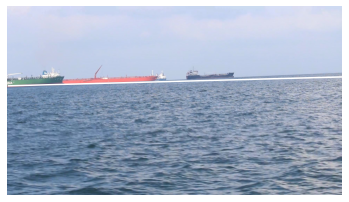

In [7]:
# ==== Draw horizon line for the image ====
# Read de base image
frame_number = 0
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
print(horizon)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create horizon line
line = plt.axhline(y=horizon[1][0][0], xmin=0, xmax=1, color='w', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# -- Rotate line --
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3][0][0]))
line.set_transform(line.get_transform() + t)

# Disable axis print
plt.axis("off")

plt.show()

### Gerando imagens GT

Essa seção traz dois exemplo: como gera o GT para uma imagem e como gerar para todas as imagens do arquivo GT. O arquivo GT ainda deve ser especificado para os dois casos (na primeira célula de código).



#### Gera GT frame 0
Gera a imagem GT para um único frame. O frame deve ser especificado.

Uma imagem base é usada para se saber as dimensões com que a imagem GT deve ser criada.

Uma matriz com as mesmas dimensões da imagem base é criada para representar a imagem GT, em que 1 representa os pixels que constituem a linha do horizonte e 0 os que não constituem.

Ao se criar a figura que será plotada deve-se passar suas dimensões em polegadas e deve ser exibida em escalas de cinza.

dimensões da matriz: 1080 x 1920
dimensões da matriz em polegada: 11.250000036000001 x 20.000000064


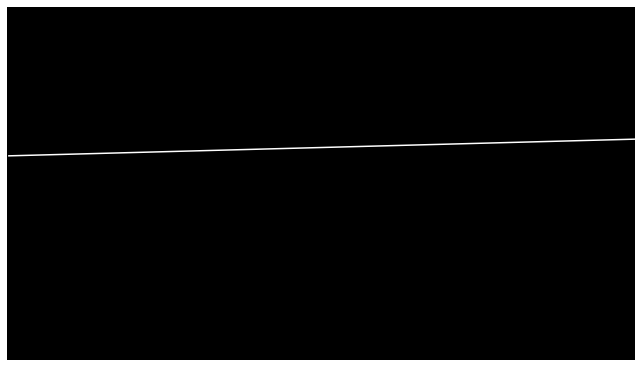

In [5]:
# Read the base image
frame_number = 0
c

# Get image dimension
len_x, len_y = len(im), len(im[0])
print("dimensões da matriz: " + str(len_x) + ' x ' + str(len_y))

# Create Gt matrix image
gt = np.zeros((len_x, len_y), dtype=np.uint8)

# Dimension in inches
lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
print("dimensões da matriz em polegada: " + str(lenp_x) + ' x ' + str(lenp_y))
# Create figure and axes
fig,ax = plt.subplots(figsize=(lenp_x, lenp_y))

# Display the image with gray scale
ax.imshow(gt, cmap='gray')

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]

# Create the horizon line
line = plt.axhline(y=horizon[1][0][0], color='1', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# Rotate line
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().translate(-15, 0).rotate_deg_around(coords[0], coords[1], math.asin(horizon[3][0][0]))
line.set_transform(line.get_transform() + t)

# Disable axis print
plt.axis("off")

plt.show()

# Save the image wihout padding
fig.savefig('GTimage.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)

---------------------------------------

In [4]:
# Flood Fill

def flood_recursive(matrix):
    width = len(matrix)
    height = len(matrix[0])
    def fill(x,y,start_color,color_to_update):
        #if the square is not the same color as the starting point
        if matrix[x][y] != start_color:
            return
        #if the square is not the new color
        elif matrix[x][y] == color_to_update:
            return
        else:
            #update the color of the current square to the replacement color
            matrix[x][y] = color_to_update
            neighbors = [(x-1,y),(x+1,y),(x-1,y-1),(x+1,y+1),(x-1,y+1),(x+1,y-1),(x,y-1),(x,y+1)]
            for n in neighbors:
                if 0 <= n[0] <= width-1 and 0 <= n[1] <= height-1:
                    fill(n[0],n[1],start_color,color_to_update)
    #pick a random starting point
    start_x = random.randint(0,width-1)
    start_y = random.randint(0,height-1)
    start_color = matrix[start_x][start_y]
    fill(start_x,start_y,start_color,1)
    return matrix

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return r

In [ ]:
import random

im2 = np.array(Image.open("GTimage.jpeg"), dtype=np.uint8)

im3 = rgb2gray(im2)
#print(len(im3))
#print(len(im3[0]))
image_final = flood_recursive(im3)

# Create figure and axes
fig1,ax1 = plt.subplots(1)

# Display the image
ax1.imshow(im3)

plt.show()

----------------------------

In [8]:
def flood_fill(x ,y, old, new):
    # we need the x and y of the start position, the old value,
    # and the new value
    # the flood fill has 4 parts
    # firstly, make sure the x and y are inbounds
    if x < 0 or x >= len(field[0]) or y < 0 or y >= len(field):
        return
    # secondly, check if the current position equals the old value
    if field[y][x] != old:
        return
    
    # thirdly, set the current position to the new value
    field[y][x] = new
    # fourthly, attempt to fill the neighboring positions
    flood_fill(x+1, y, old, new)
    flood_fill(x-1, y, old, new)
    flood_fill(x, y+1, old, new)
    flood_fill(x, y-1, old, new)
    
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return r

In [9]:
# we'll need a 2D array to practice on
field = [
    [0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0],
    [0,1,1,0,0,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,1,1,0],
]


def print_field():
    # this function will print the contents of the array
    for y in range(len(field)):
        for x in range(len(field[0])):
            # value by column and row
            print(field[y][x], end=' ')
            if x == len(field[0])-1:
                # print a new line at the end of each row
                print('\n')
                
                

#im2 = np.array(Image.open("GTimage.jpeg"), dtype=np.uint8)
#im2 = np.array(Image.open("GTimage.jpeg"), dtype=np.uint8)

im3 = rgb2gray(fig)
#print(len(im3))
#print(len(im3[0]))


image_final = flood_fill(0, 0, 0, 1)

# Create figure and axes
fig1,ax1 = plt.subplots(1)

# Display the image
ax1.imshow(im3)

plt.show()

TypeError: 'Figure' object is not subscriptable

------------------------------------

dimensões da matriz: 400 x 225
dimensões da matriz em polegada: 4.1666666800000005 x 2.3437500075


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

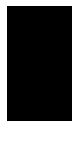

In [12]:
# Read de base image
frame_number = 0
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OBR_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im[0]), len(im)
print("dimensões da matriz: " + str(len_x) + ' x ' + str(len_y))

# Create Gt matrix image
gt = np.zeros((len_x, len_y), dtype=np.uint8)

# Dimension in inches
lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
print("dimensões da matriz em polegada: " + str(lenp_x) + ' x ' + str(lenp_y))
# Create figure and axes
fig,ax = plt.subplots(figsize=(lenp_x, lenp_y))

# Display the image with gray scale
ax.imshow(gt, cmap='gray')

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]

# Create the horizon line
line = plt.axhline(y=horizon[1], color='1', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# Rotate line
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
line.set_transform(line.get_transform() + t)

# Disable axis print
plt.axis("off")

x = np.arange(0.0, 2, 0.01)
ax.fill_between(x, line)

plt.show()

# Save the image wihout padding
fig.savefig('GTimage.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)

#### Gera GT de todos os frames

Gera as imagens GT para um todos frames do arquivo GT. Segue os mesmos parâmetros da seção acima.

In [4]:
# Read de base image
im = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame0.jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im[0]), len(im)

# frame_number is used to control the frame number
frame_number = 0
# horizon = data frame <count> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
for horizon in data['structXML'][0]:
    print(horizon)
    # Create Gt matrix image
    gt = np.zeros((len_x, len_y), dtype=np.uint8)

    # Dimension in inches
    lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
    # Create figure and axes
    fig,ax = plt.subplots(figsize=(lenp_x, lenp_y))

    # Display the image with gray scale
    ax.imshow(gt, cmap='gray')

    # Create horizon line
    line = plt.axhline(y=horizon[1], color='1', linestyle='-')

    # Convert coordinates
    ts = ax.transData
    coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

    # Rotate line
    # Rotate the line around x, y in alpha degrees
    t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
    line.set_transform(line.get_transform() + t)

    # Disable axis print
    plt.axis("off")

    plt.show()

    # Save the image wihout padding
    fig.savefig('GT' + str(frame_number) + '.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)
    frame_number = frame_number + 1

FileNotFoundError: [Errno 2] No such file or directory: '../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame0.jpg'

## PILLOW

#### Gera GT frame 0

In [3]:
# Aplicando linha rotacionada na imagem


# Read GT data
data = loadmat("../../Dataset/VIS_Onboard/HorizonGT/MVI_0788_VIS_OB_HorizonGT")

# Read de base image
frame_number = 0
#base = np.array(Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = 1920, 1080
print("Dimensões do frame: " + str(len_x) + ' x ' + str(len_y))

# Create GT image
# use the line below to see the horizon line in binary image ----
# PIL.Image.new(binary chanel, (x dimension, y dimension))
gt = PIL.Image.new('1', (len_x, len_y))
# use the line below to see the horizon line in the sea image ----
# Image.open(image_path)
#gt = Image.open("../../Dataset/VIS_Onboard/VIS_Onboard_frames/MVI_0788_VIS_OB_frame" + str(frame_number) + ".jpg")

# Create a draw with the image
draw = ImageDraw.Draw(gt)

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
print(horizon)


# ------- Create the horizon line -------
# cosine and sine from GT file horizon line
c, s = horizon[2], horizon[3]
# horizon line angle
rad = math.asin(horizon[3]) - math.radians(90)
# cosine and sine to plot horizon line
c, s = math.cos(rad), math.sin(rad)

# central point
cx = horizon[0]
cy = horizon[1]

# start point and end point
x1 = 0 # start point
y1 = cy
x2 = len_x # end point
y2 = cy

# rotated points
xr1 = c*(x1-cx) - s*(y1-cy) + cx
yr1 = s*(x1-cx) + c*(y1-cy) + cy
xr2 = c*(x2-cx) - s*(y2-cy) + cx
yr2 = s*(x2-cx) + c*(y2-cy) + cy
# ---------------------------------------

# Draw the horizon line
# draw.line((x start point, y start point, x end point, y end point), white color, 1 pixel of width)
draw.line((xr1, yr1, xr2, yr2), fill=1, width=6)

# Show the image
#gt.show()

gt = gt.resize((x_size, y_size))

# Save the image
gt.save("GTs/MVI_0788_VIS_OB_gt" + str(frame_number) + ".jpeg", "JPEG")

Dimensões do frame: 1920 x 1080
(array([[960.5]]), array([[421.85573106]]), array([[0.04375699]]), array([[0.9990422]]))


A imagem está ficando 90 graus errada (Arrumado. Por quê?)

#### Gera GT de todos os frames

In [ ]:
# Base image dimension
len_x, len_y = 1920, 1080
# Read GT data
data = loadmat("../../Dataset/VIS_Onboard/HorizonGT/MVI_0788_VIS_OB_HorizonGT")

# Control de frame number
frame_number = 0

# Read line per line of GT file
# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
for horizon in data['structXML'][0]:
    # Create GT image
    # PIL.Image.new(binary chanel, (x dimension, y dimension))
    gt = PIL.Image.new('1', (len_x, len_y))

    # Create a draw with the image
    draw = ImageDraw.Draw(gt)


    # ------- Create the horizon line -------
    # cosine and sine from GT file horizon line
    c, s = horizon[2], horizon[3]
    # horizon line angle
    rad = math.asin(horizon[3]) - math.radians(90)
    # cosine and sine to plot horizon line
    c, s = math.cos(rad), math.sin(rad)

    # central point
    cx = float(horizon[0][0])
    cy = float(horizon[1][0])

    # start point and end point
    x1 = 0 # start point
    y1 = cy
    x2 = len_x # end point
    y2 = cy

    # rotated points
    xr1 = c*(x1-cx) - s*(y1-cy) + cx
    yr1 = s*(x1-cx) + c*(y1-cy) + cy
    xr2 = c*(x2-cx) - s*(y2-cy) + cx
    yr2 = s*(x2-cx) + c*(y2-cy) + cy
    # ---------------------------------------

    # Draw the horizon line
    # draw.line((x start point, y start point, x end point, y end point), white color, 1 pixel of width)
    draw.line((xr1, yr1, xr2, yr2), fill=1, width=6)

    # Show the image
    #gt.show()

    gt = gt.resize((x_size, y_size))

    # Save the image
    gt.save("GTs/MVI_0788_VIS_OB_GT" + str(frame_number) + ".jpg")
    frame_number = frame_number + 1